In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
import os
import time
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [3]:
BUFFER_SIZE = 400
BATCH_SIZE = 32
IMG_WIDTH = 256
IMG_HEIGHT = 256

PHOTO_FOLDER_PATH = '../sketchy_database/256x256/photo/tx_000100000000/'
SKETCH_FOLDER_PATH = '../sketchy_database/256x256/sketch/tx_000100000000/'

In [4]:
def get_category_names():
    directories = [x[1] for x in os.walk(PHOTO_FOLDER_PATH)]
    non_empty_dirs = [x for x in directories if x]
    return [item for subitem in non_empty_dirs for item in subitem]

In [5]:
def get_file_names(folder_path, category):
    return os.listdir(folder_path + category)

In [6]:
def load_image_pair(photo_file_path, sketch_file_path):
    photo = tf.io.read_file(photo_file_path)
    photo = tf.image.decode_jpeg(photo)
    photo = tf.cast(photo, tf.float32)
    
    sketch = tf.io.read_file(sketch_file_path)
    sketch = tf.image.decode_jpeg(sketch)
    sketch = tf.cast(sketch, tf.float32)
    
    return photo, sketch

[1/125] Loading data for category: door
[2/125] Loading data for category: tiger
[3/125] Loading data for category: sheep
[4/125] Loading data for category: car_(sedan)
[5/125] Loading data for category: seal
[6/125] Loading data for category: bee
[7/125] Loading data for category: knife
[8/125] Loading data for category: zebra
[9/125] Loading data for category: seagull
[10/125] Loading data for category: hot-air_balloon
[11/125] Loading data for category: crocodilian
[12/125] Loading data for category: flower
[13/125] Loading data for category: sailboat
[14/125] Loading data for category: apple
[15/125] Loading data for category: eyeglasses
[16/125] Loading data for category: giraffe
[17/125] Loading data for category: hammer
[18/125] Loading data for category: bread
[19/125] Loading data for category: pig
[20/125] Loading data for category: bat
[21/125] Loading data for category: kangaroo
[22/125] Loading data for category: piano
[23/125] Loading data for category: teapot
[24/125] Lo

/home/leytonblackler/anaconda3/envs/tensorflow_gpuenv/lib/python3.5/site-packages/matplotlib/pyplot.py:513: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


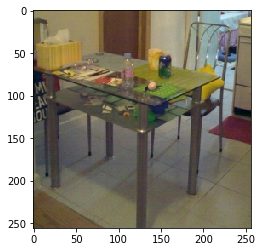

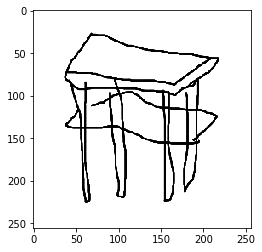

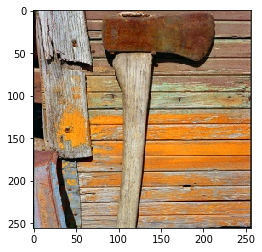

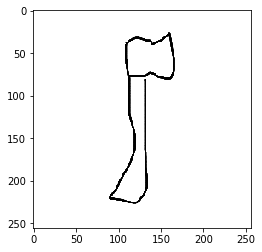

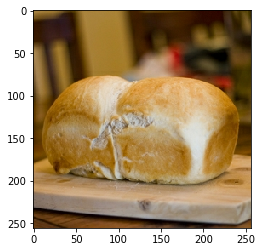

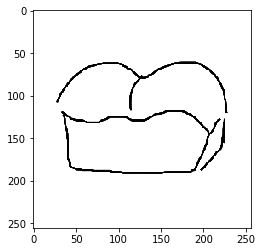

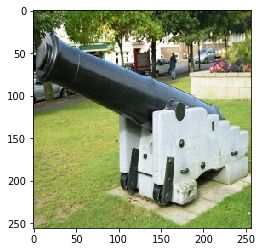

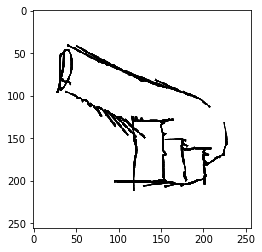

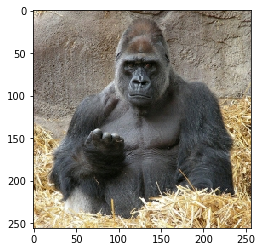

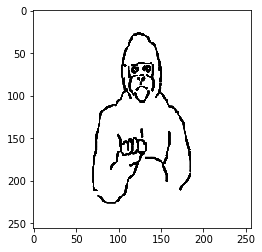

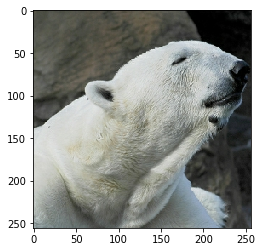

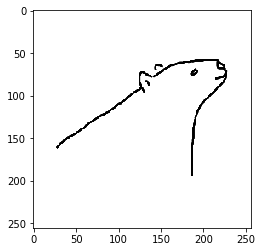

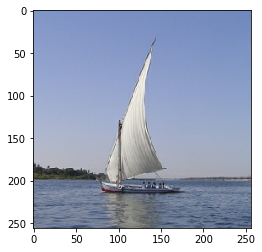

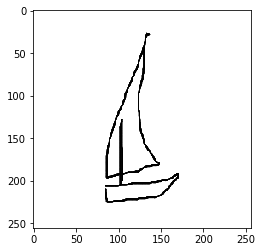

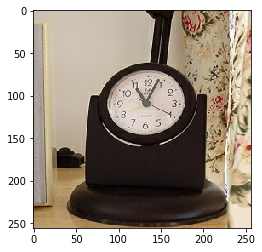

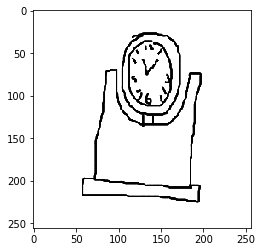

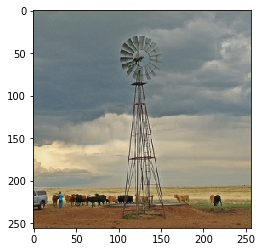

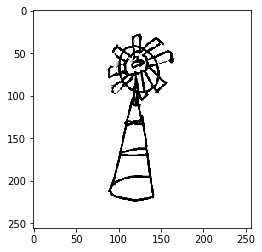

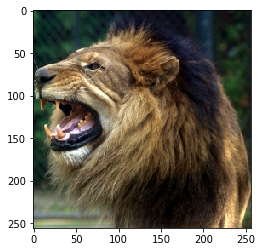

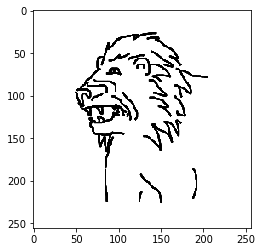

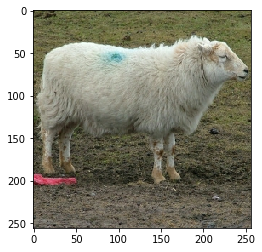

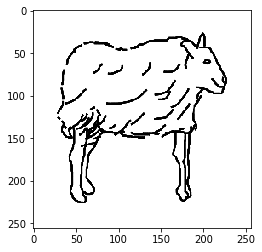

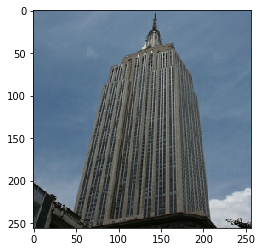

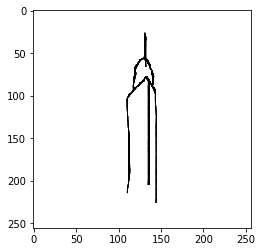

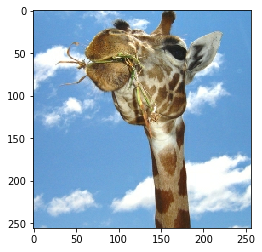

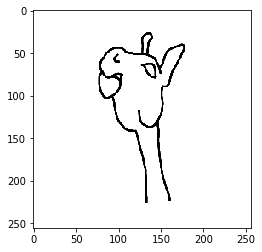

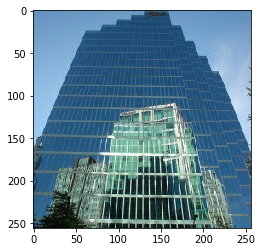

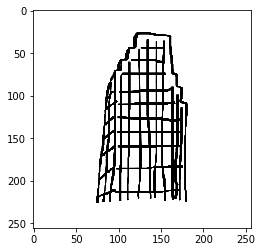

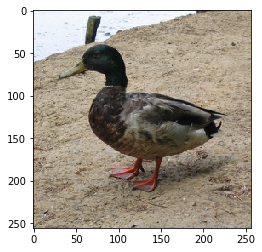

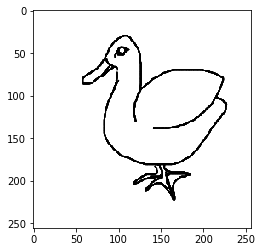

In [12]:
training_photo_file_paths = []
training_sketch_file_paths = []

# Get the category names based on the names of the subfolders in the sketchy database.
category_names = get_category_names()
category_count = 1

# Iterate across each of the category names (e.g. airplane, alarm_clock, ant, etc.)
for category_name in category_names:
    print('[' + str(category_count) + '/' + str(len(category_names)) + '] Loading data for category: ' + category_name)
    
    # Create a list containing all the file names of photos from the current category.
    photo_file_names = get_file_names(PHOTO_FOLDER_PATH, category_name)
    
    # Create a list containing all the file names of sketches from the current category.
    sketch_file_names = get_file_names(SKETCH_FOLDER_PATH, category_name)
    
    # Iterate across each of the photo files.
    for photo_file_name in photo_file_names:
        
        # Define the function that will be used to determine if a sketch file is a pair to the current photo file.
        def filterFunction(file_name):
            if file_name[:-6] == photo_file_name[:-4]:
                return True
            else:
                return False

        # Use the filter function to create a new list containing the file names of sketches that are a pair to the current photo file.
        sketch_pair_file_names = list(filter(filterFunction, sketch_file_names))
        
        for sketch_file_name in sketch_pair_file_names:
            # photo = load(PHOTO_FOLDER_PATH + category_name + '/' + photo_file_name)
            # sketch = load(SKETCH_FOLDER_PATH + category_name + '/' + sketch_file_name)
            # pair = [photo, sketch]
            # training_data.append(pair)
            training_photo_file_paths.append(PHOTO_FOLDER_PATH + category_name + '/' + photo_file_name)
            training_sketch_file_paths.append(SKETCH_FOLDER_PATH + category_name + '/' + sketch_file_name)

    category_count += 1

total_image_pairs = len(training_photo_file_paths)
print("Photo-sketch image pairs in training dataset: " + str(total_image_pairs))

# Create a combined dataset including the file names of both the photos and sketches.
training_dataset = tf.data.Dataset.from_tensor_slices((training_photo_file_paths, training_sketch_file_paths))

# Shuffle the dataset (batch size is the total number of images so the categories are sufficiently mixed together).
# (Having a smaller batch size, e.g. 400, would only shuffle the first 400 images amongst eachother, then the next 400, etc)
training_dataset = training_dataset.shuffle(total_image_pairs)

# Applies the load_image_pair function to each pair of file names, resulting in the dataset becoming pairs of actual images.
training_dataset = training_dataset.map(load_image_pair, num_parallel_calls=tf.data.experimental.AUTOTUNE)

count = 0
for photo, sketch in training_dataset:
    plt.figure()
    plt.imshow(photo/255.0)
    plt.figure()
    plt.imshow(sketch/255.0)
    count += 1
    if count == 15:
        break